In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

#read all the images
img1 = cv2.imread("DIP_Lab_task_01.png")
img2 = cv2.imread("DIP_Lab_task_02.jpg")
img3 = cv2.imread("DIP_Lab_task_03.png")
img4 = cv2.imread("DIP_Lab_task_04.jpg")
img5 = cv2.imread("DIP_Lab_task_05.jpg")

# Task 1: Image Dimension, Frequency Distribution and Intensity ranges

Image Dimension:  225 225 3


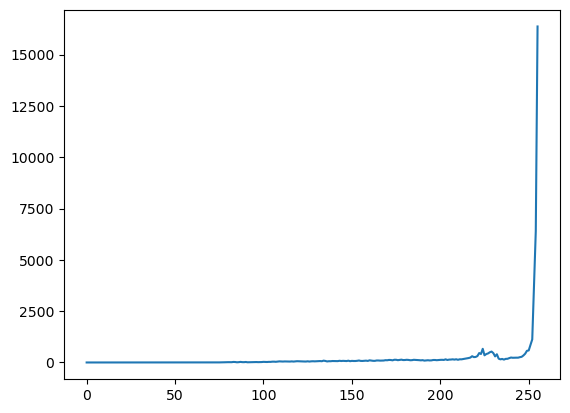

Min intensity:  5
Max intensity:  255
251


In [ ]:
# Image Dimenstion
rows, cols, channels = img1.shape
print("Image Dimension: ", rows, cols, channels)

# Frequency Distribution
hist = cv2.calcHist([img1], [0], None, [256], [0, 256])
plt.plot(hist)
plt.show()

#range
print("Min intensity: ", img1.min())
print("Max intensity: ", img1.max())
print(img1.max() - img1.min() + 1)

# Task 2: RGB to Gray 

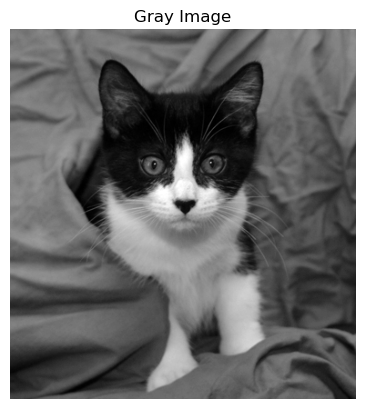

In [11]:
def rgb_to_gray(image):
  rows, cols, channels = image.shape
  result = np.zeros((rows, cols), dtype=np.uint8)
  for i in range(rows):
    for j in range(cols):
      r, g, b = image[i, j]
      result[i, j] = r*0.29 + g*0.58 + b*0.11
  return result

gray_img = rgb_to_gray(img2)

plt.imshow(gray_img, cmap = 'gray')
plt.axis('off')
plt.title('Gray Image')
plt.show()

# Task 3

# Identify the noise

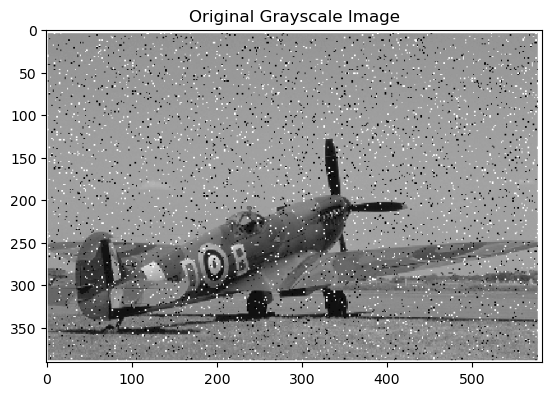

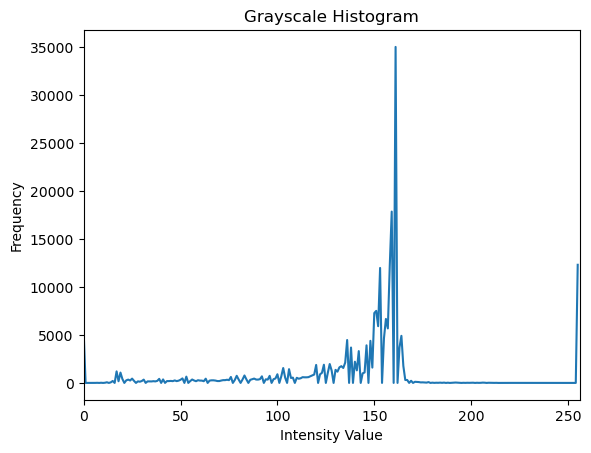

In [12]:
gray_image = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

plt.figure()
plt.title('Original Grayscale Image')
plt.imshow(gray_image, cmap='gray')
plt.show()

histogram = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
plt.figure()
plt.title('Grayscale Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.plot(histogram)
plt.xlim([0, 256])
plt.show()

# smoothing with appropriate kernel

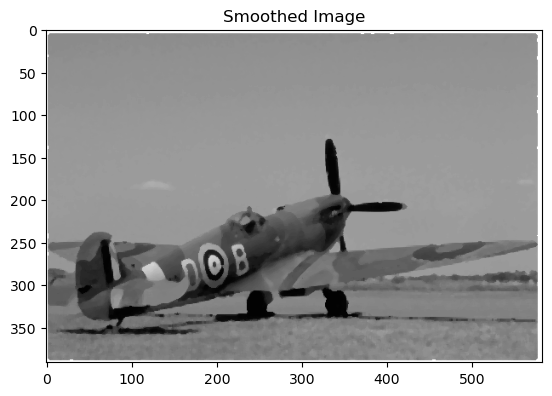

In [13]:
smoothed_image = cv2.medianBlur(gray_image, 5)
plt.figure()
plt.title('Smoothed Image')
plt.imshow(smoothed_image, cmap='gray')
plt.show()

# Task 4: Reduce the brightness

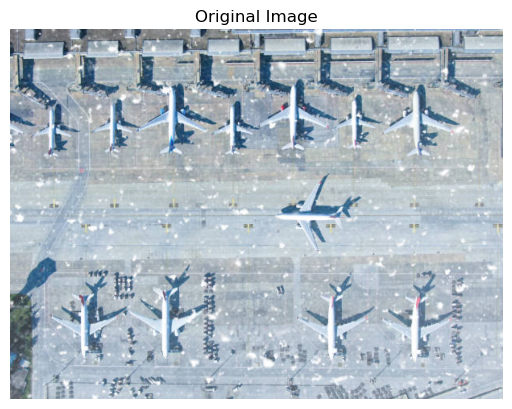

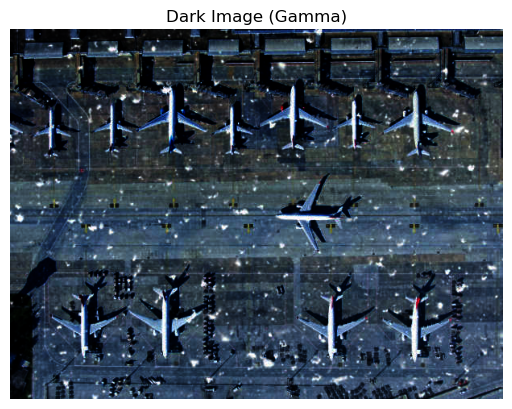

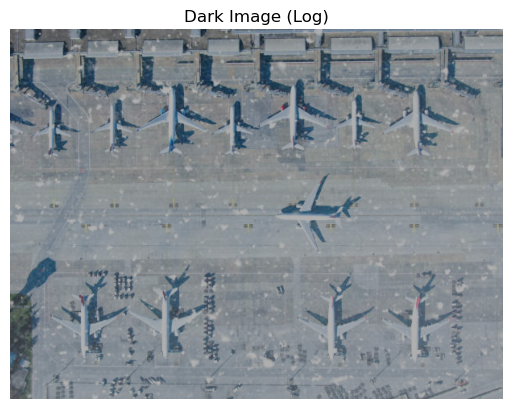

In [14]:
img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)

def gammaTrans(image, gamma, c=1):
    normal = image / 255.0
    result = c * (normal ** gamma)
    result = np.clip(result * 255, 0, 255).astype(np.uint8)
    return result

def logTrans(image, c=1):
    normal = image / 255.0
    rows, cols, channels = image.shape
    result = np.zeros_like(normal)
    for i in range(rows):
        for j in range(cols):
            for k in range(channels):
                result[i, j, k] = min(1.0, c * np.log1p(normal[i, j, k]))
    result = np.clip(result * 255, 0, 255).astype(np.uint8)
    return result

plt.imshow(img4)
plt.axis('off')
plt.title('Original Image')
plt.show()

dark_img = gammaTrans(img4, 5)
plt.imshow(dark_img)
plt.axis('off')
plt.title('Dark Image (Gamma)')
plt.show()

dark1 = logTrans(img4, 1)
plt.imshow(dark1)
plt.axis('off')
plt.title('Dark Image (Log)')
plt.show()


# Task 5: Solve the segmentation problem

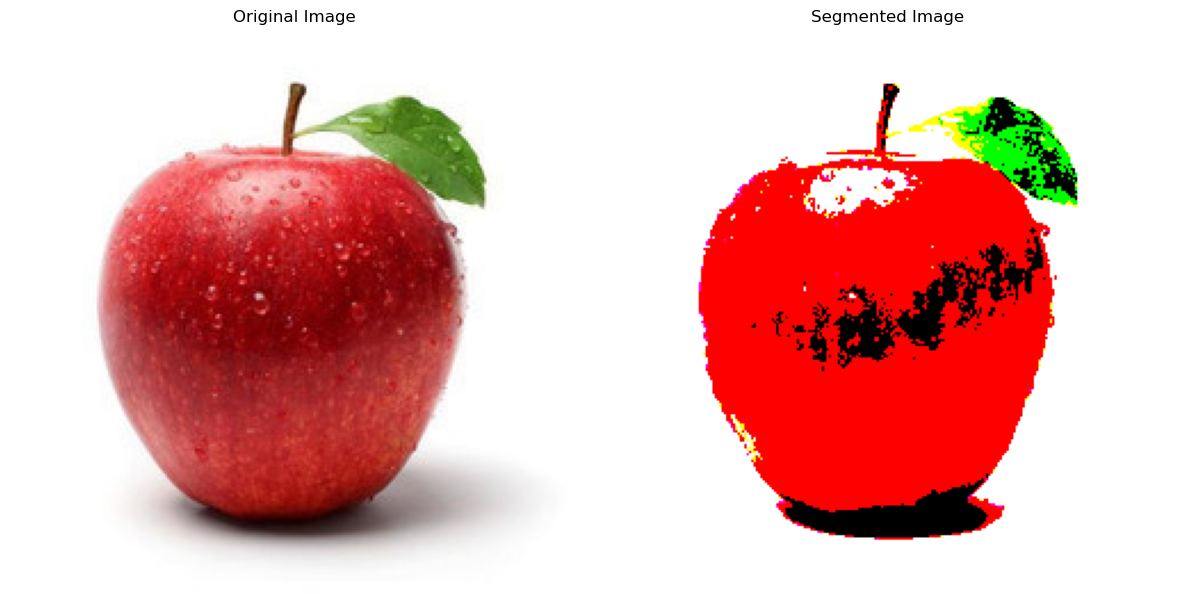

In [15]:
original_img = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)

segmented_img = img5.copy()

threshold = 128
rows, cols, channels = segmented_img.shape

for i in range(rows):
    for j in range(cols):
        for k in range(channels):
            if segmented_img[i, j, k] > threshold:
                segmented_img[i, j, k] = 255
            else:
                segmented_img[i, j, k] = 0

segmented_img_rgb = cv2.cvtColor(segmented_img, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(original_img)
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(segmented_img_rgb)
axes[1].set_title('Segmented Image')
axes[1].axis('off')

plt.tight_layout()
plt.show()